# Supply Chain Management_ML Project(warehouse inventory management)

# Objective:: The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time from the respective warehouse.

# LIBRARIES:

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
import warnings 
warnings.filterwarnings('ignore')


In [21]:
#LOAD TRAIN DATASET AND TEST DATASET
train=pd.read_excel("C:/Users/uday/Desktop/ML PROJECTS/LIVE PROJECT BY POOJA/Supplychain train dataset.xlsx")
test=pd.read_excel("C:/Users/uday/Desktop/ML PROJECTS/LIVE PROJECT BY POOJA/Supply chain test dataset.xlsx")


In [22]:
df=train.copy()
df1=test.copy()

# DF IS TRAIN DATASET AND DF1 IS TEST DATASET

In [23]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [24]:
df1.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,WH_122250,EID_72250,Rural,Large,North,Zone 6,7,0,2,5397,...,0,1,75,30.0,2019.0,9,1,A,1,29
1,WH_122251,EID_72251,Rural,Large,North,Zone 6,8,2,2,5183,...,0,0,138,20.0,2006.0,25,0,A,4,23
2,WH_122252,EID_72252,Rural,Large,North,Zone 6,3,0,4,4665,...,0,1,188,34.0,NaN,24,0,B,4,23
3,WH_122253,EID_72253,Rural,Mid,North,Zone 2,2,0,3,5196,...,0,1,156,31.0,NaN,15,0,A,4,1
4,WH_122254,EID_72254,Rural,Mid,North,Zone 2,5,2,4,8275,...,0,1,237,NaN,NaN,21,1,B+,2,12


In [25]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [26]:
df1.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m'],
      dtype='object')

In [27]:
df.shape

(22150, 24)

In [28]:
df1.shape

(2750, 23)

# 1. Checking and Treating Missing Values:

In [29]:
# Checking missing values of training dataset:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       877
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      805
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [30]:
# Checking missing values of testing dataset:
df1.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      110
wh_est_year                     1288
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     101
wh_breakdown_l3m                   0
govt_check_l3m                     0
dtype: int64

# 2.Missing Values Imputation:

In [31]:
#training dataset:
df['workers_num'].fillna(df1['workers_num'].median(),inplace=True)
df['workers_num'].median()

28.0

In [32]:
df['wh_est_year'].fillna(df1['wh_est_year'].median(),inplace=True)
df['wh_est_year'].median()

2009.0

In [33]:
df['approved_wh_govt_certificate'].fillna(df1['approved_wh_govt_certificate'].mode()[0],inplace=True)
df['approved_wh_govt_certificate'].mode()

0    C
dtype: object

In [34]:
#testing data:
df1['workers_num'].fillna(df1['workers_num'].median(),inplace=True)
df1['workers_num'].median()



28.0

In [35]:
df1['wh_est_year'].fillna(df1['wh_est_year'].median(),inplace=True)
df1['wh_est_year'].median()

2009.0

In [36]:
df1['approved_wh_govt_certificate'].fillna(df1['approved_wh_govt_certificate'].mode()[0],inplace=True)
df1['approved_wh_govt_certificate'].mode()

0    C
dtype: object

In [37]:
df.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [38]:
df1.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
dtype: int64

# 3. Outlinear Detection and Removal :

# outlier detection:

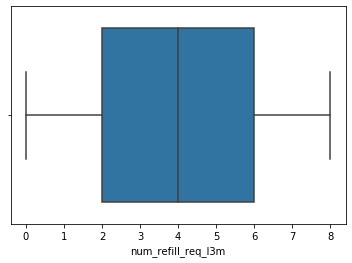

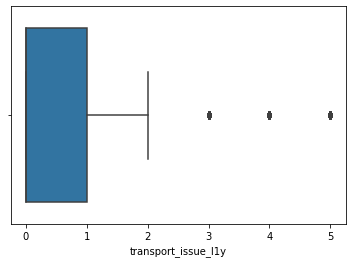

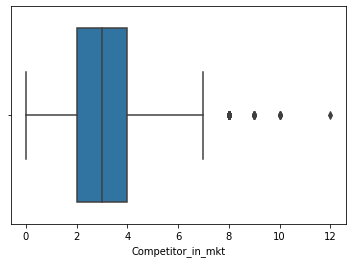

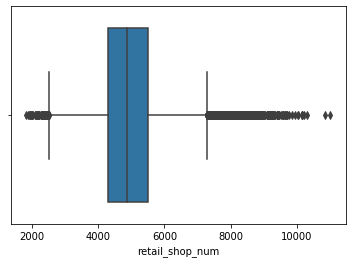

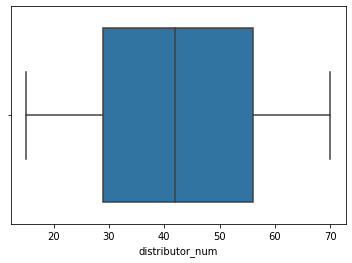

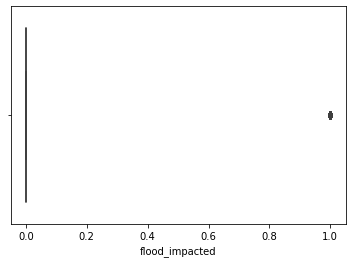

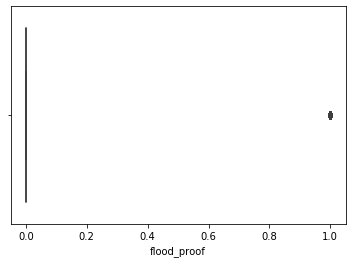

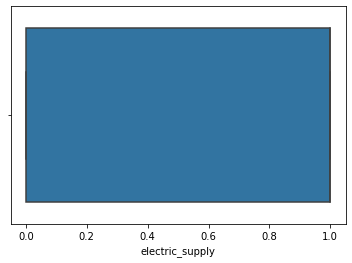

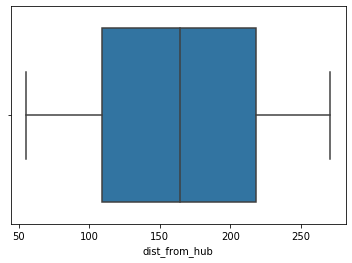

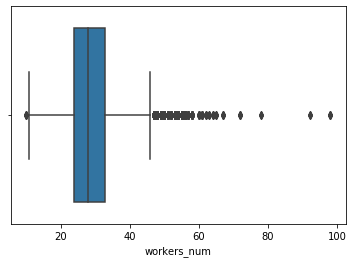

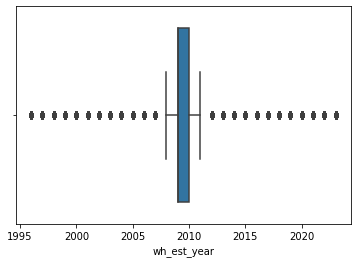

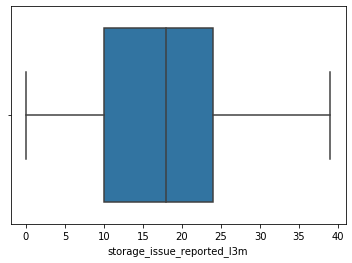

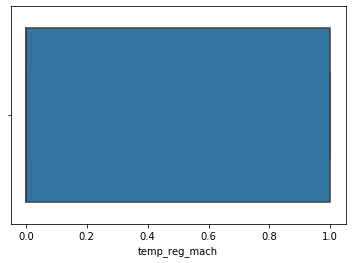

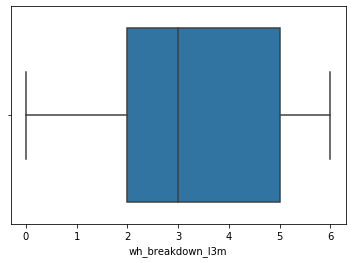

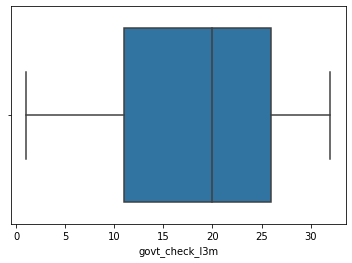

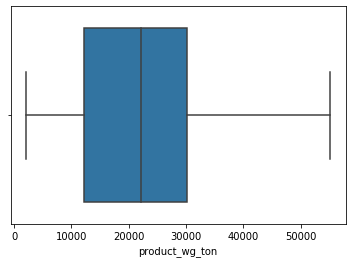

In [39]:
#train dataset:
for col in df.describe().columns:
    sns.boxplot(df[col])
    plt.show()

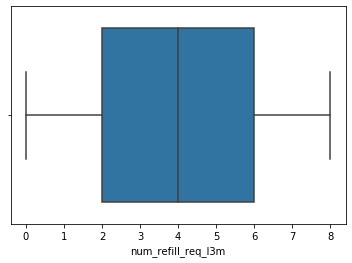

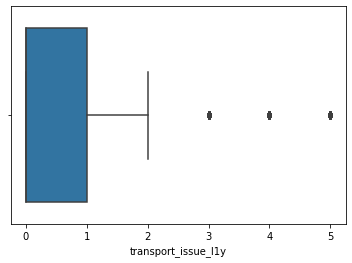

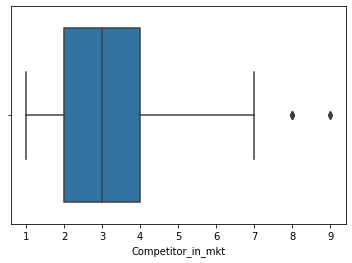

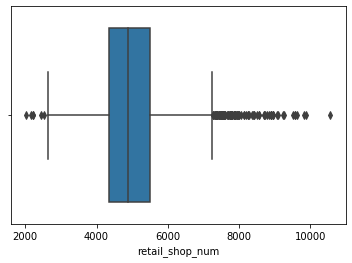

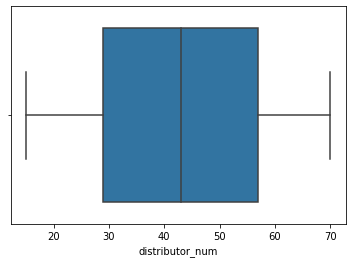

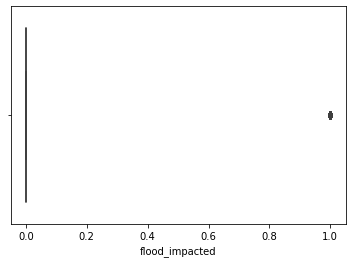

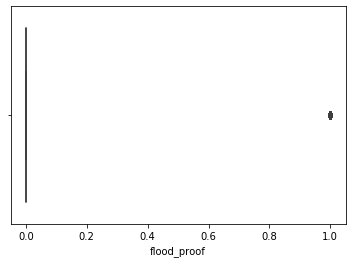

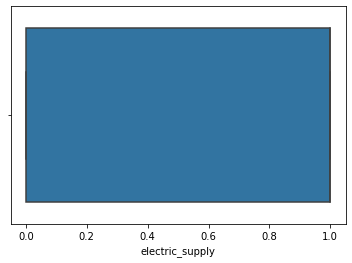

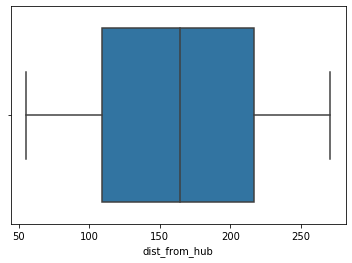

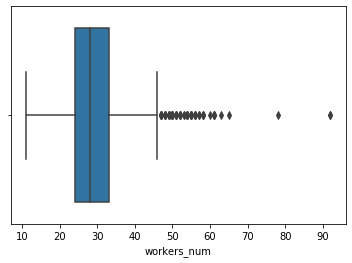

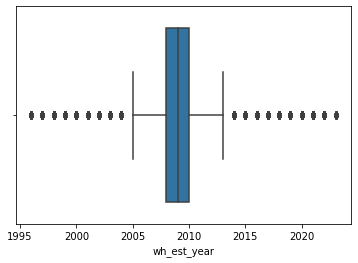

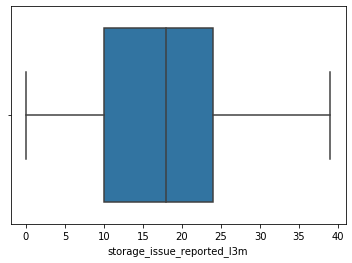

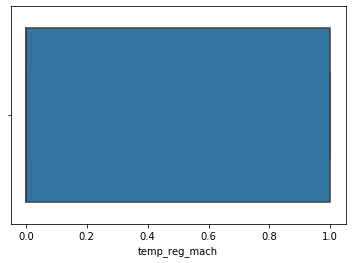

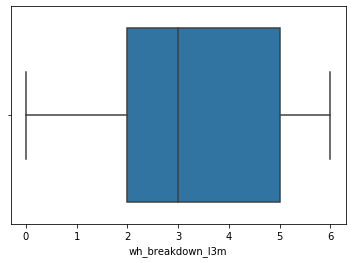

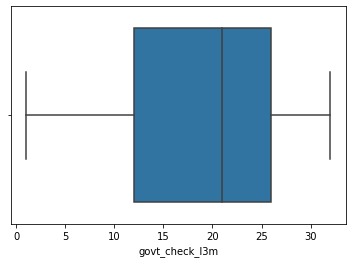

In [40]:
#testing dataset:
for col in df1.describe().columns:
    sns.boxplot(df1[col])
    plt.show()

# Removing outliers:

In [41]:
#training dataset:
col_sel=['Competitor_in_mkt','retail_shop_num','distributor_num','workers_num','wh_est_year']
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))


iqr_capping(df, col_sel, 1.5)

In [42]:
#testing dataset:
col_sel=['Competitor_in_mkt','retail_shop_num','distributor_num','workers_num','wh_est_year']
def iqr_capping(df1, cols, factor):
    
    for col in cols:
        
        q1 = df1[col].quantile(0.25)
        q3 = df1[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df1[col] = np.where(df1[col]>upper_whisker, upper_whisker,
                 np.where(df1[col]<lower_whisker, lower_whisker, df1[col]))


iqr_capping(df1, col_sel, 1.5)

# Removed outliers:

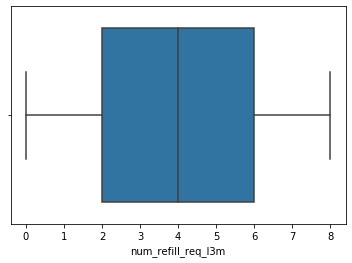

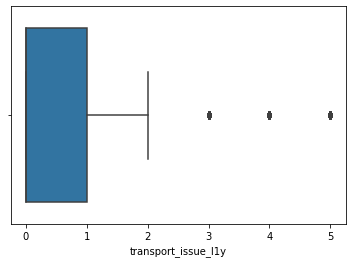

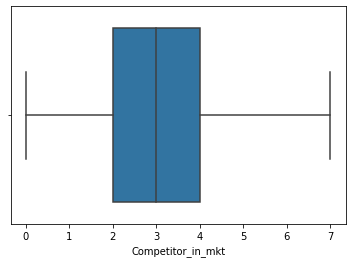

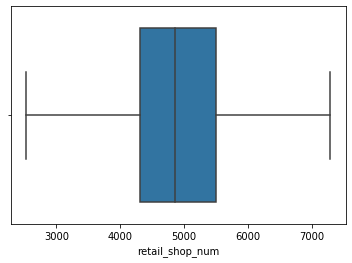

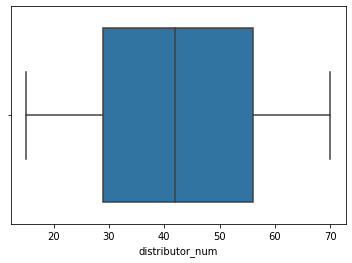

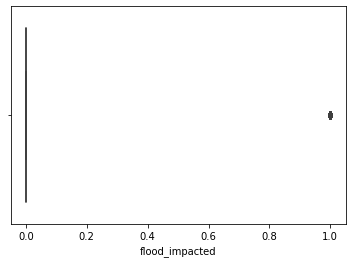

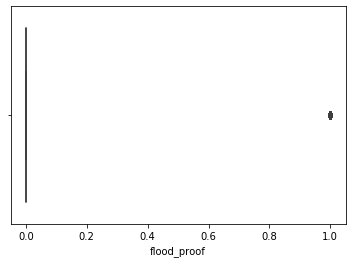

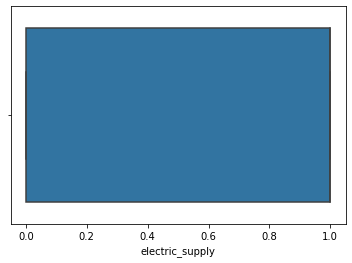

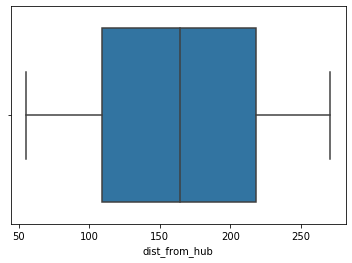

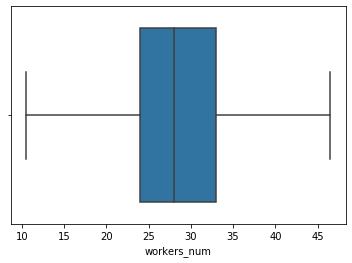

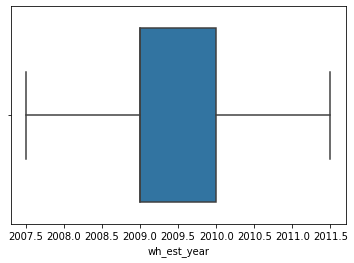

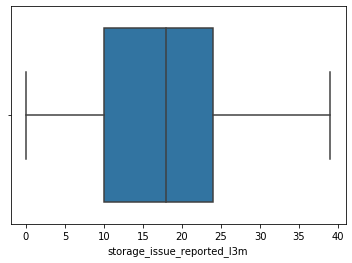

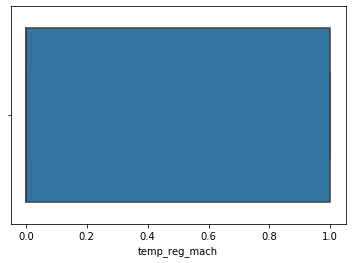

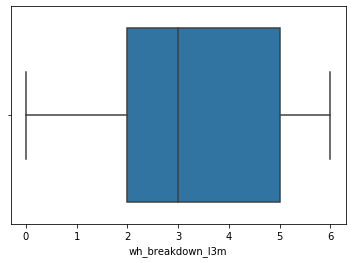

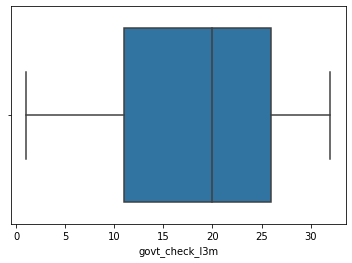

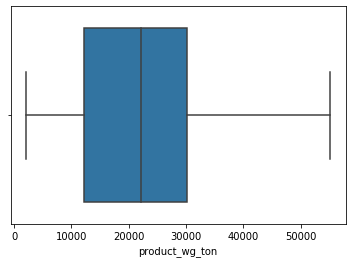

In [43]:
#training dataset:
for col in df.describe().columns:
    sns.boxplot(df[col])
    plt.show()

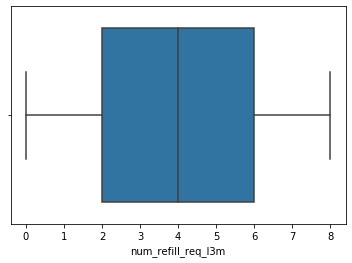

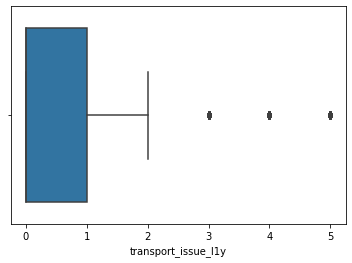

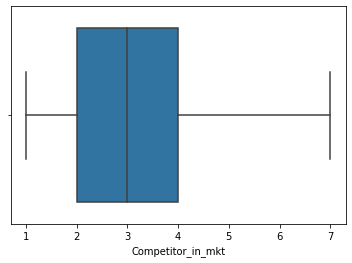

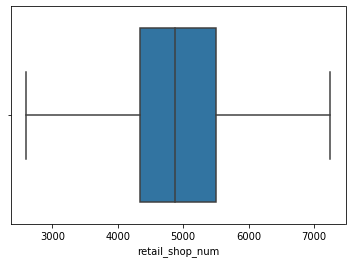

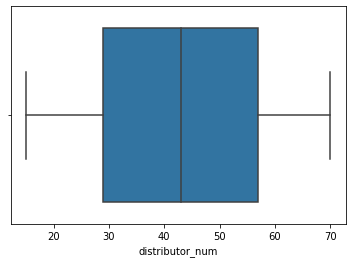

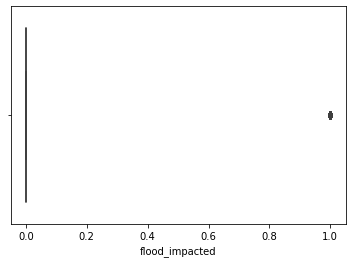

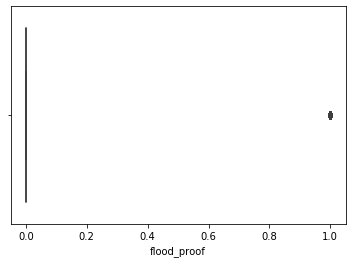

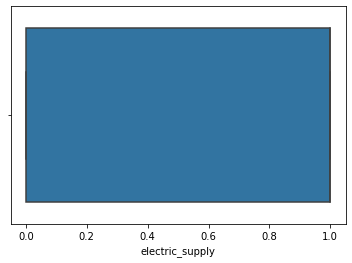

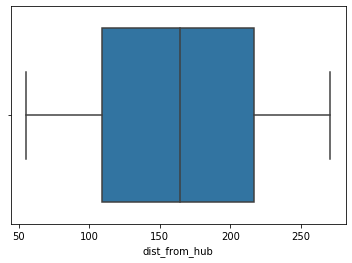

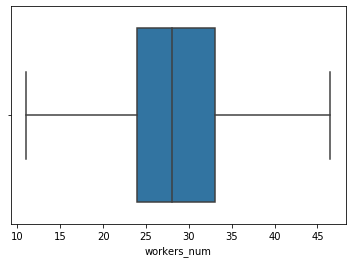

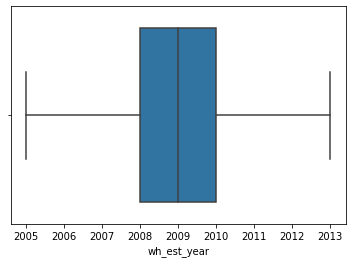

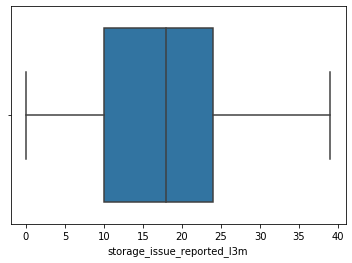

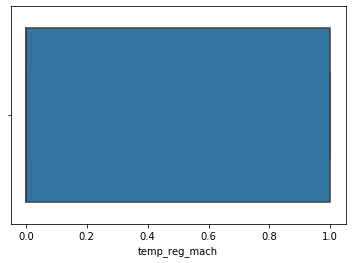

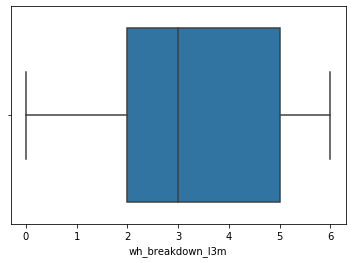

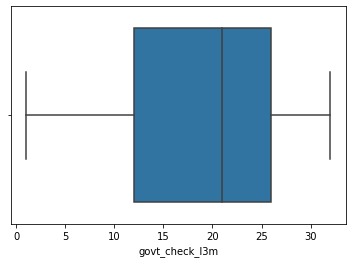

In [44]:
#testing dataset:
for col in df1.describe().columns:
    sns.boxplot(df1[col])
    plt.show()

# 4. Feature Engineering:

In [45]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Adding new features to training dataset:

In [46]:
#1.New_temp_reg_mach
df['New_temp_reg_mach']=(df['temp_reg_mach']+df['electric_supply'])
#Chi2_Square test:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df['New_temp_reg_mach'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")
#anova test:

new=ols('product_wg_ton ~ New_temp_reg_mach',data=df).fit()
Anova=sm.stats.anova_lm(new,typ=2)
Anova

chi2_value:   9255.6
p_value: 0.014825
dof_value:  8962


,sum_sq,df,F,PR(>F)
New_temp_reg_mach,1.392062e+10,1.0,103.463675,2.998576e-24
Residual,2.979923e+12,22148.0,NaN,NaN


In [47]:
#drop the feature:
df=df.drop(['New_temp_reg_mach'],axis=1)

In [48]:
#2.Location_type:
df['New_Location_type']=(df['Location_type']+df['zone']+df['WH_regional_zone'])
#Chi2_Square test:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df['New_Location_type'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")
#Anova:
new=ols('product_wg_ton ~New_Location_type ',data=df).fit()
Anova=sm.stats.anova_lm(new,typ=2)
Anova


chi2_value:   2.0356e+05
p_value: 0.0013239
dof_value:  2.0164e+05


,sum_sq,df,F,PR(>F)
New_Location_type,2.318918e+10,45.0,3.834348,9.573998e-17
Residual,2.970655e+12,22104.0,NaN,NaN


In [49]:
#Drop the feature due to p value less than Alpha Value No need to create new column.
df=df.drop(['New_Location_type'],axis=1)

In [50]:
#3.wh_est_year:
df['New_wh_est_year']=(df['wh_est_year']+df['workers_num'])
#Chi2_Square test:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df['New_wh_est_year'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")
#Anova:
new=ols('product_wg_ton ~ New_wh_est_year',data=df).fit()
Anova=sm.stats.anova_lm(new,typ=2)
Anova

chi2_value:   3.4497e+05
p_value: 1
dof_value:  3.4952e+05


,sum_sq,df,F,PR(>F)
New_wh_est_year,3.666651e+10,1.0,274.616547,2.618919e-61
Residual,2.957177e+12,22148.0,NaN,NaN


according to anova test we have to drop feature but according to chi-square test we can add the feature.



In [51]:
#4.wh_breakdown_l3m:
df['New_Wh_breakdown']=(df['wh_breakdown_l3m']+df['govt_check_l3m'])
#Chi2_Square test:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df['New_Wh_breakdown'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")
#Anova:
new=ols('product_wg_ton ~ New_Wh_breakdown',data=df).fit()
Anova=sm.stats.anova_lm(new,typ=2)
Anova

chi2_value:   1.6637e+05
p_value: 0.15969
dof_value:  1.658e+05


,sum_sq,df,F,PR(>F)
New_Wh_breakdown,8.847904e+09,1.0,65.649462,5.663291e-16
Residual,2.984996e+12,22148.0,NaN,NaN


We can keep the feature because p value greater than Alpha value

In [62]:
#5.total Wh breakdown:
df['total_wh_breakdown_l3m']=(df['wh_breakdown_l3m']+df['govt_check_l3m']
                               +df['transport_issue_l1y']+df['Competitor_in_mkt']+df['distributor_num']
                               +df['flood_impacted']+df['flood_proof']+df['electric_supply']+df['workers_num']
                               +df['storage_issue_reported_l3m']+df['temp_reg_mach'])
#Chi2_Square test:
from scipy.stats import chi2_contingency
hypothesis=pd.crosstab(df['total_wh_breakdown_l3m'],df['product_wg_ton'])
chi2_stat,p,dof,expected=chi2_contingency(hypothesis)
print(f"chi2_value:   {chi2_stat:0.5g}")
print(f"p_value: {p:0.5g}")
print(f"dof_value:  {dof:0.5g}")
#Anova:
new=ols('product_wg_ton ~ total_wh_breakdown_l3m',data=df).fit()
Anova=sm.stats.anova_lm(new,typ=2)
Anova

chi2_value:   1.1469e+06
p_value: 0
dof_value:  1.0127e+06


,sum_sq,df,F,PR(>F)
total_wh_breakdown_l3m,5.526248e+11,1.0,5013.697352,0.0
Residual,2.441219e+12,22148.0,NaN,NaN


In [63]:
df.shape

(22150, 27)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  float64
 9   retail_shop_num               22150 non-null  float64
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  float64
 12  flood_impacted                22150 non-null  int64  
 13  f

# Adding new features to testing dataset:

In [69]:
#1.wh_est_year:
df1['New_wh_est_year']=(df1['wh_est_year']+df1['workers_num'])
#2.wh_breakdown_l3m:
df1['New_Wh_breakdown']=(df1['wh_breakdown_l3m']+df1['govt_check_l3m'])
#3.Total Wh breakdown:
df1['total_wh_breakdown_l3m']=(df1['wh_breakdown_l3m']+df1['govt_check_l3m']+df1['transport_issue_l1y']
                        +df1['Competitor_in_mkt']+df1['distributor_num']+df1['flood_impacted']
                        +df1['flood_proof']+df1['electric_supply']
                        +df1['workers_num']
                        +df1['storage_issue_reported_l3m']+df1['temp_reg_mach'])






In [75]:
df1=df1.drop(['New_Location_type'],axis=1)

KeyError: "['New_Location_type'] not found in axis"

In [76]:
df1=df1.drop(['New_temp_reg_mach'],axis=1)

In [77]:
df1.shape

(2750, 26)

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 2750 non-null   object 
 1   WH_Manager_ID                 2750 non-null   object 
 2   Location_type                 2750 non-null   object 
 3   WH_capacity_size              2750 non-null   object 
 4   zone                          2750 non-null   object 
 5   WH_regional_zone              2750 non-null   object 
 6   num_refill_req_l3m            2750 non-null   int64  
 7   transport_issue_l1y           2750 non-null   int64  
 8   Competitor_in_mkt             2750 non-null   float64
 9   retail_shop_num               2750 non-null   float64
 10  wh_owner_type                 2750 non-null   object 
 11  distributor_num               2750 non-null   float64
 12  flood_impacted                2750 non-null   int64  
 13  flo

# 5.Data Preparation(ENCODING):

# Training data:

In [79]:
df.select_dtypes(include = ['object']).columns


Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [80]:
df.select_dtypes(include = ['int64','float']).columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'New_wh_est_year',
       'New_Wh_breakdown', 'total_wh_breakdown_l3m'],
      dtype='object')

In [81]:
new_df = pd.get_dummies(df,columns = ['Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'], drop_first = True)

In [82]:
new_df.drop(['Ware_house_ID','WH_Manager_ID'],axis=1,inplace=True)

In [83]:
pd.set_option('display.max_columns',None)
new_df.head(10)


,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,New_wh_est_year,New_Wh_breakdown,total_wh_breakdown_l3m,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,3,1,2.0,4651.0,24.0,0,1,1,91,29.0,2009.0,13,0,5,15,17115,2038.0,20,91.0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0
1,0,0,4.0,6217.0,47.0,0,0,1,210,31.0,2009.0,4,0,3,17,5074,2040.0,20,107.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,4.0,4306.0,64.0,0,0,0,161,37.0,2009.0,17,0,6,22,23137,2046.0,28,150.0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,7,4,2.0,6000.0,50.0,0,0,0,103,21.0,2009.0,17,1,3,27,22115,2030.0,30,125.0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
4,3,1,2.0,4740.0,42.0,1,0,1,112,25.0,2009.0,18,0,6,24,24071,2034.0,30,120.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
5,8,0,2.0,5053.0,37.0,0,0,1,152,35.0,2009.0,23,1,3,3,32134,2044.0,6,105.0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
6,8,0,4.0,4449.0,38.0,0,0,1,77,27.0,2010.0,24,0,3,6,30142,2037.0,9,103.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
7,1,0,4.0,7183.0,45.0,0,0,0,241,23.0,2009.0,18,0,6,24,24093,2032.0,30,120.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
8,8,1,4.0,5381.0,42.0,0,0,1,124,22.0,2011.5,13,1,5,2,18082,2033.5,7,91.0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0
9,4,3,3.0,3869.0,35.0,0,0,0,78,43.0,2009.0,6,0,6,2,7130,2052.0,8,98.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1


In [84]:
new_df.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'New_wh_est_year',
       'New_Wh_breakdown', 'total_wh_breakdown_l3m', 'Location_type_Urban',
       'WH_capacity_size_Mid', 'WH_capacity_size_Small', 'zone_North',
       'zone_South', 'zone_West', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6',
       'wh_owner_type_Rented', 'approved_wh_govt_certificate_A+',
       'approved_wh_govt_certificate_B', 'approved_wh_govt_certificate_B+',
       'approved_wh_govt_certificate_C'],
      dtype='object')

In [85]:
new_df.shape

(22150, 35)

In [86]:
comatrix=new_df.corr()
comatrix

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,New_wh_est_year,New_Wh_breakdown,total_wh_breakdown_l3m,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
num_refill_req_l3m,1.000000,0.020336,0.006754,-0.003651,0.005063,-0.014583,-0.004816,-0.007217,-0.000611,-0.013520,0.102577,-0.007719,0.263539,0.000704,-0.006470,0.000676,0.006388,-0.006228,0.000173,0.014890,0.006760,-0.009005,-0.010916,0.000056,0.011471,0.003831,0.004905,0.001357,-0.004324,0.005417,0.009968,0.003808,0.002539,0.006154,-0.011536
transport_issue_l1y,0.020336,1.000000,-0.007563,0.001110,0.005509,-0.006671,0.003131,-0.007378,0.013864,-0.007207,-0.055595,-0.145914,0.012757,0.011795,0.006058,-0.175746,-0.017718,0.008228,-0.001595,0.010490,0.004012,0.009761,0.007607,0.002283,-0.010172,-0.011633,0.006305,0.009976,-0.005715,-0.003638,0.003214,-0.013459,-0.003035,0.013815,-0.004570
Competitor_in_mkt,0.006754,-0.007563,1.000000,-0.162411,0.000845,0.008874,-0.004502,-0.000716,0.011009,-0.004350,-0.006902,0.007446,0.011590,0.012806,-0.044714,0.007046,-0.005589,-0.041511,0.036838,0.011055,0.007998,0.007913,-0.088309,-0.307092,0.315109,-0.072800,0.019859,0.056721,-0.025948,0.016855,-0.004810,-0.000725,-0.002375,-0.005628,0.000437
retail_shop_num,-0.003651,0.001110,-0.162411,1.000000,-0.005080,-0.006429,0.004061,-0.006970,0.002491,-0.007666,0.007535,-0.007456,-0.000572,-0.006008,0.046754,-0.007366,-0.006076,0.044826,0.000181,-0.004159,-0.012726,0.072838,0.053551,0.017137,-0.065831,0.016668,-0.059608,0.019795,-0.031522,0.008851,0.004131,-0.005715,0.005931,0.004265,-0.004426
distributor_num,0.005063,0.005509,0.000845,-0.005080,1.000000,0.008004,-0.006096,-0.000763,-0.007538,-0.011227,-0.005658,0.003314,0.004048,0.001885,-0.005996,0.005143,-0.012096,-0.005535,0.730409,-0.004784,0.001726,0.001792,-0.002554,-0.004008,0.008369,-0.001834,-0.000499,0.004285,0.003992,-0.005969,0.001674,0.006939,0.003043,-0.008558,-0.002887
flood_impacted,-0.014583,-0.006671,0.008874,-0.006429,0.008004,1.000000,0.106622,0.167565,0.005620,0.153375,0.001471,-0.006221,-0.011838,-0.000023,-0.001179,-0.005055,0.150720,-0.001164,0.071026,0.003740,-0.004800,0.012500,0.017539,-0.004172,-0.011782,-0.008286,-0.009415,0.008942,-0.005565,0.002909,-0.109783,0.001250,-0.011248,0.002123,0.001393
flood_proof,-0.004816,0.003131,-0.004502,0.004061,-0.006096,0.106622,1.000000,0.115616,-0.003186,0.043522,-0.000977,-0.005069,0.004251,-0.007964,-0.007171,-0.003567,0.042502,-0.008586,0.018511,0.003656,0.005644,0.000390,-0.004526,0.001117,0.002373,-0.007958,0.011173,0.004765,-0.000216,-0.002082,-0.028026,0.002288,-0.010401,-0.007258,0.005178
electric_supply,-0.007217,-0.007378,-0.000716,-0.006970,-0.000763,0.167565,0.115616,1.000000,-0.002138,0.356225,-0.007007,-0.000821,-0.006324,-0.012428,-0.007258,-0.000725,0.348063,-0.009530,0.136024,-0.005345,-0.009568,-0.000960,0.005041,-0.001935,-0.002364,-0.011537,0.010330,-0.011384,0.005704,0.003592,-0.229568,-0.004161,-0.005487,0.007462,0.001091
dist_from_hub,-0.000611,0.013864,0.011009,0.002491,-0.007538,0.005620,-0.003186,-0.002138,1.000000,-0.014410,0.007450,-0.006531,0.000175,0.001300,0.002769,-0.006040,-0.012707,0.002973,-0.010451,-0.001036,0.004285,-0.002912,-0.004239,0.004174,0.002049,-0.000212,-0.005417,0.010443,0.001431,-0.002658,-0.000290,0.003430,0.002448,-0.004036,-0.005478
workers_num,-0.013520,-0.007207,-0.004350,-0.007666,-0.011227,0.153375,0.043522,0.356225,-0.014410,1.000000,0.003265,-0.009073,-0.002201,-0.017832,-0.006361,-0.008325,0.981481,-0.009688

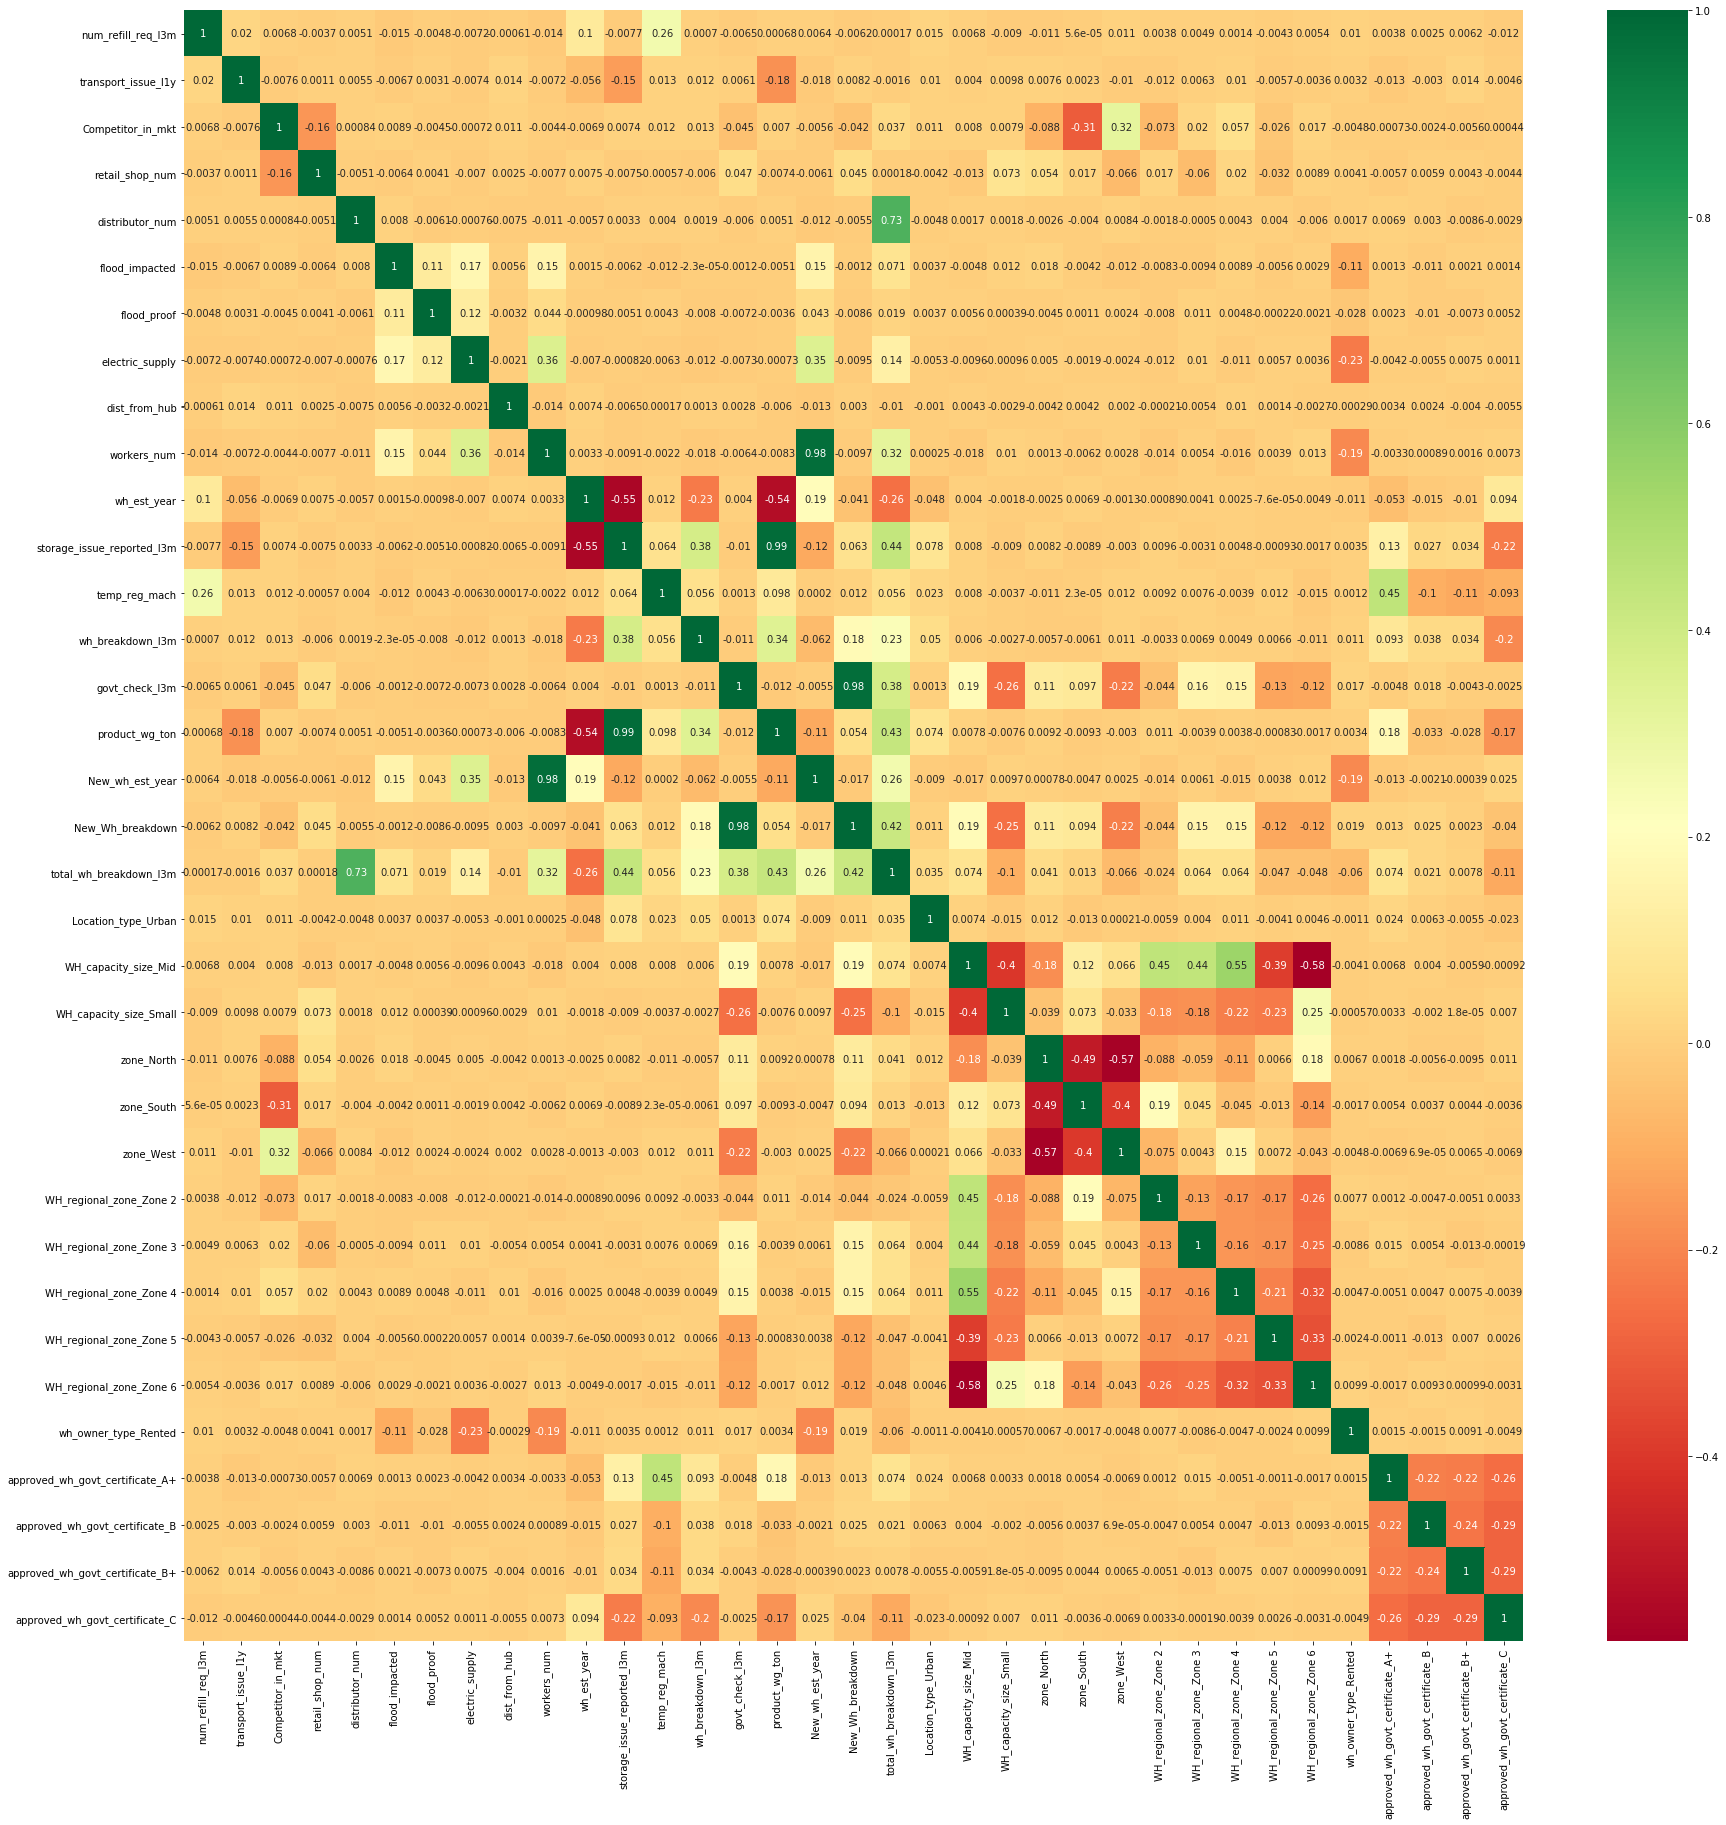

In [87]:
#Training Data:
top_corr_feat=comatrix.index
plt.figure(figsize=(30,30))
g=sns.heatmap(new_df[top_corr_feat].corr(),annot=True,cmap='RdYlGn')

# TESTING DATA:

In [47]:
df1.select_dtypes(include = ['object']).columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate', 'New_Location_type'],
      dtype='object')

In [88]:
df1.select_dtypes(include = ['int64','float']).columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'New_wh_est_year', 'New_Wh_breakdown',
       'total_wh_breakdown_l3m'],
      dtype='object')

In [89]:
new_df1 = pd.get_dummies(df1,columns = ['Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'], drop_first = True)

In [90]:
new_df1.drop(['Ware_house_ID','WH_Manager_ID'],axis=1,inplace=True)

In [91]:
new_df1.head(10)

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,New_wh_est_year,New_Wh_breakdown,total_wh_breakdown_l3m,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,7,0,2.0,5397.000,26.0,0,0,1,75,30.0,2013.0,9,1,1,29,2043.0,30,99.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,8,2,2.0,5183.000,61.0,0,0,0,138,20.0,2006.0,25,0,4,23,2026.0,27,137.0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
2,3,0,4.0,4665.000,26.0,0,0,1,188,34.0,2009.0,24,0,4,23,2043.0,27,116.0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0
3,2,0,3.0,5196.000,36.0,0,0,1,156,31.0,2009.0,15,0,4,1,2040.0,5,91.0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0
4,5,2,4.0,7248.125,58.0,0,0,1,237,28.0,2009.0,21,1,2,12,2037.0,14,129.0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
5,1,0,3.0,5392.000,41.0,0,0,1,90,29.0,2009.0,5,0,2,23,2038.0,25,104.0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1
6,8,0,4.0,4508.000,16.0,0,0,1,187,19.0,2005.0,28,0,5,23,2024.0,28,96.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
7,7,0,4.0,5338.000,42.0,0,0,1,70,36.0,2006.0,19,0,2,17,2042.0,19,121.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
8,0,1,2.0,4309.000,25.0,0,0,1,132,38.0,2009.0,18,0,3,22,2047.0,25,110.0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
9,4,3,4.0,4682.000,45.0,0,0,1,218,33.0,2005.0,25,1,3,12,2038.0,15,127.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [92]:
new_df1.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'New_wh_est_year', 'New_Wh_breakdown',
       'total_wh_breakdown_l3m', 'Location_type_Urban', 'WH_capacity_size_Mid',
       'WH_capacity_size_Small', 'zone_North', 'zone_South', 'zone_West',
       'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3',
       'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5',
       'WH_regional_zone_Zone 6', 'wh_owner_type_Rented',
       'approved_wh_govt_certificate_A+', 'approved_wh_govt_certificate_B',
       'approved_wh_govt_certificate_B+', 'approved_wh_govt_certificate_C'],
      dtype='object')

In [93]:
new_df1.shape

(2750, 34)

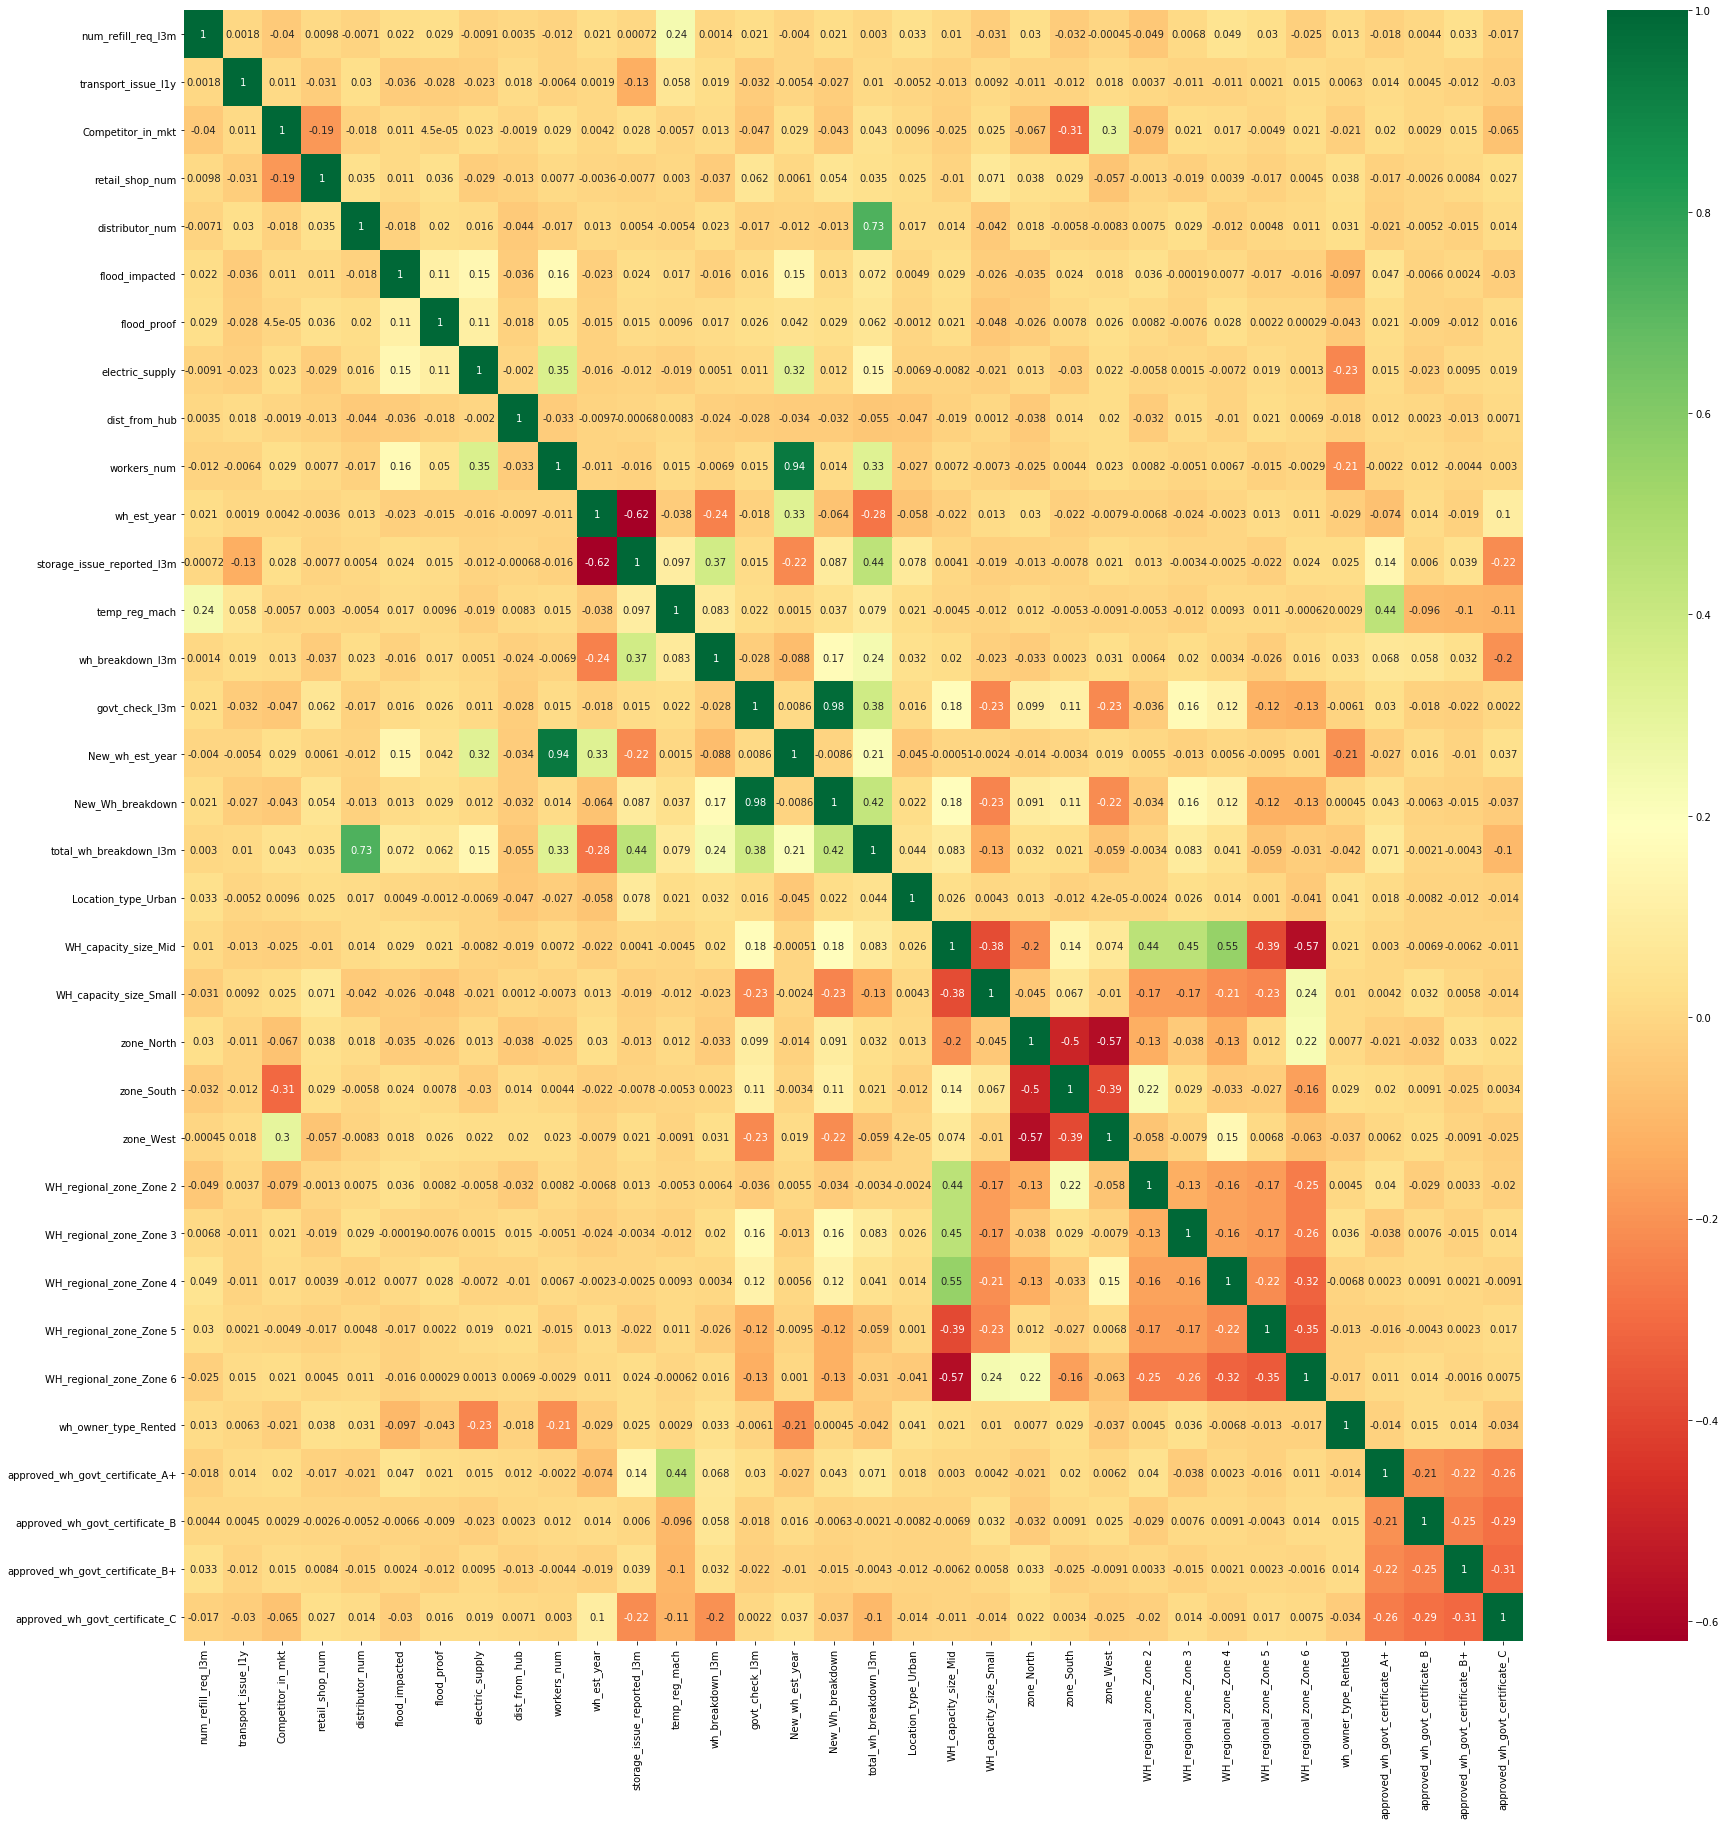

In [95]:
#Testing Data:
comatrix=new_df1.corr()
top_corr_feat=comatrix.index
plt.figure(figsize=(30,30))
g=sns.heatmap(new_df1[top_corr_feat].corr(),annot=True,cmap='RdYlGn')

In [96]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   num_refill_req_l3m               22150 non-null  int64  
 1   transport_issue_l1y              22150 non-null  int64  
 2   Competitor_in_mkt                22150 non-null  float64
 3   retail_shop_num                  22150 non-null  float64
 4   distributor_num                  22150 non-null  float64
 5   flood_impacted                   22150 non-null  int64  
 6   flood_proof                      22150 non-null  int64  
 7   electric_supply                  22150 non-null  int64  
 8   dist_from_hub                    22150 non-null  int64  
 9   workers_num                      22150 non-null  float64
 10  wh_est_year                      22150 non-null  float64
 11  storage_issue_reported_l3m       22150 non-null  int64  
 12  temp_reg_mach     

In [97]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   num_refill_req_l3m               2750 non-null   int64  
 1   transport_issue_l1y              2750 non-null   int64  
 2   Competitor_in_mkt                2750 non-null   float64
 3   retail_shop_num                  2750 non-null   float64
 4   distributor_num                  2750 non-null   float64
 5   flood_impacted                   2750 non-null   int64  
 6   flood_proof                      2750 non-null   int64  
 7   electric_supply                  2750 non-null   int64  
 8   dist_from_hub                    2750 non-null   int64  
 9   workers_num                      2750 non-null   float64
 10  wh_est_year                      2750 non-null   float64
 11  storage_issue_reported_l3m       2750 non-null   int64  
 12  temp_reg_mach       

# 6. VIF calculation:

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results.

In [98]:
# Let's check multicollinearity for training dataset:
# to calculated VIF we can use the loop
Default_indep=new_df.loc[:,new_df.columns!='product_wg_ton']

import statsmodels.api as sm
features=list(Default_indep.columns)
for i in range(1, len(Default_indep.columns)):
    x=Default_indep.loc[:,Default_indep.columns!=features[i]]
    y=Default_indep.loc[:,Default_indep.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))


R-Sqr value of transport_issue_l1y is 1.0
VIF for transport_issue_l1y is inf
R-Sqr value of Competitor_in_mkt is 1.0
VIF for Competitor_in_mkt is inf
R-Sqr value of retail_shop_num is 0.9648392060014499
VIF for retail_shop_num is 28.44
R-Sqr value of distributor_num is 1.0
VIF for distributor_num is inf
R-Sqr value of flood_impacted is 1.0
VIF for flood_impacted is inf
R-Sqr value of flood_proof is 1.0
VIF for flood_proof is inf
R-Sqr value of electric_supply is 1.0
VIF for electric_supply is inf
R-Sqr value of dist_from_hub is 0.8722337766562285
VIF for dist_from_hub is 7.83
R-Sqr value of workers_num is 1.0
VIF for workers_num is inf
R-Sqr value of wh_est_year is 1.0
VIF for wh_est_year is inf
R-Sqr value of storage_issue_reported_l3m is 1.0
VIF for storage_issue_reported_l3m is inf
R-Sqr value of temp_reg_mach is 1.0
VIF for temp_reg_mach is inf
R-Sqr value of wh_breakdown_l3m is 1.0
VIF for wh_breakdown_l3m is inf
R-Sqr value of govt_check_l3m is 1.0
VIF for govt_check_l3m is inf
R

# We see high multicollinearity with features, can treat them with PCA or iterative method

In [99]:
#We can reduce the multicollinearity with PCA 

from sklearn.decomposition import PCA
pca=PCA()

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scalar=StandardScaler()

scalar.fit(Default_indep)
scaled_df=scalar.transform(Default_indep)

In [102]:
# finding the PCA
PCA_result=pca.fit(scaled_df)
PCA_result.components_

array([[ 1.19194722e-03,  3.64338379e-03,  3.59534290e-02, ...,
        -2.22707629e-02, -4.11714917e-03,  7.70049165e-02],
       [ 9.64405592e-03,  1.66468814e-02,  7.04413018e-06, ...,
        -4.54664390e-03, -5.88824711e-03,  3.87017713e-02],
       [ 8.71971250e-03,  1.42352314e-02,  3.00532589e-02, ...,
        -3.51626901e-02, -2.42080198e-02,  2.00272747e-01],
       ...,
       [-0.00000000e+00,  2.51714026e-03,  2.34990497e-03, ...,
        -3.49656078e-17, -6.46971550e-18, -5.86495161e-17],
       [-0.00000000e+00,  3.60764773e-02,  3.36796064e-02, ...,
        -9.28590052e-17, -1.23747896e-16,  2.83396152e-17],
       [-0.00000000e+00, -3.88991049e-05, -3.63147026e-05, ...,
         3.83204424e-17, -1.12732447e-16,  4.58181105e-17]])

In [103]:
PCA_result.explained_variance_

array([3.01682585e+00, 2.52594722e+00, 2.33073143e+00, 2.07488488e+00,
       1.73003059e+00, 1.60348164e+00, 1.43703910e+00, 1.41353696e+00,
       1.30192212e+00, 1.24284307e+00, 1.21915286e+00, 1.18140324e+00,
       1.09941056e+00, 1.03784236e+00, 1.02703323e+00, 1.01279393e+00,
       9.87099187e-01, 9.71425334e-01, 9.47948545e-01, 9.26568715e-01,
       8.66112722e-01, 7.78114461e-01, 7.43109957e-01, 7.07003755e-01,
       5.82168943e-01, 5.28628662e-01, 3.87861823e-01, 2.28867774e-01,
       6.77327601e-02, 2.40133661e-02, 5.94963994e-31, 8.31472267e-32,
       6.36520578e-32, 2.92270888e-32])

# 7.SPLIT THE DATA:

In [104]:
#TRAINING DATASET:
X=new_df.drop('product_wg_ton',axis = 1)
X.head()


,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,New_wh_est_year,New_Wh_breakdown,total_wh_breakdown_l3m,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,3,1,2.0,4651.0,24.0,0,1,1,91,29.0,2009.0,13,0,5,15,2038.0,20,91.0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0
1,0,0,4.0,6217.0,47.0,0,0,1,210,31.0,2009.0,4,0,3,17,2040.0,20,107.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,4.0,4306.0,64.0,0,0,0,161,37.0,2009.0,17,0,6,22,2046.0,28,150.0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,7,4,2.0,6000.0,50.0,0,0,0,103,21.0,2009.0,17,1,3,27,2030.0,30,125.0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
4,3,1,2.0,4740.0,42.0,1,0,1,112,25.0,2009.0,18,0,6,24,2034.0,30,120.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [105]:
y = new_df['product_wg_ton']
y.head()

0    17115
1     5074
2    23137
3    22115
4    24071
Name: product_wg_ton, dtype: int64

In [106]:
#split the data into 70:30 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, random_state=10)

In [107]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15504, 34)
(6646, 34)
(15504,)
(6646,)


# LINEAR REGRESSION:

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
from sklearn import metrics

In [109]:
lm=LinearRegression()

In [110]:
#Train Data:
lm.fit(X_train,y_train)
predit=lm.predict(X_test)
lm_mape=mean_absolute_error(y_test,predit)*100

print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))
print("MAPE",lm_mape)
print("RMSE",math.sqrt(mean_squared_error(y_test,predit)))


R_score is  0.9854354199374966
MSE 2032555.1340327163
MAPE 101581.50968664857
RMSE 1425.6770791566778


In [111]:
#TEST DATA:
lm.fit(X_test,y_test)
predit=lm.predict(X_test)
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))
print("MAPE:",mean_absolute_error(y_test, predit)*100)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predit)))

R_score is  0.9855495280149633
MSE 2016630.819174737
MAPE: 102387.8220914198
RMSE: 1420.081272031547


# DECISION TREE:

In [112]:
#Training Data:
from sklearn.tree import DecisionTreeRegressor
Des= DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 0.1, random_state = 0)
Des.fit(X_train,y_train)
predit=Des.predict(X_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))
print("MAPE:",mean_absolute_error(y_test, predit)*100)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predit)))

R_score is  0.947677721762594
MSE 7301818.164295776
MAPE: 198449.81286715638
RMSE: 2702.1876626718167


In [113]:
#Testing Data:
Des.fit(X_test,y_test)
predit=Des.predict(X_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))
print("MAPE:",mean_absolute_error(y_test, predit)*100)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predit)))

R_score is  0.9517206637950537
MSE 6737606.7315316675
MAPE: 189419.20371793205
RMSE: 2595.690029940337


# RANDOM FOREST:

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

#np.random.seed(42) getting same train and test sets across diff executions.

In [115]:
rfr=RandomForestRegressor(n_estimators=100)#no.of trees

In [116]:
#Train Data:
#np.random.seed(42)
rfr.fit(X_train,y_train)
predit=rfr.predict(X_test)
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))
print("MAPE:",mean_absolute_error(y_test, predit)*100)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predit)))

R_score is  0.9937537960843875
MSE 871686.9132106832
MAPE: 68509.13030394223
RMSE: 933.6417477869567


In [117]:
#Test Data:
#np.random.seed(42)
rfr.fit(X_test,y_test)
predit=rfr.predict(X_test)
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))
print("MAPE:",mean_absolute_error(y_test, predit)*100)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predit)))

R_score is  0.9990441464553611
MSE 133393.82400326512
MAPE: 26895.14580198616
RMSE: 365.23119253873307


# XGBoosting:

In [119]:
#Train Data:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train,y_train)
predit=xg.predict(X_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))
print("MAPE:",mean_absolute_error(y_test, predit)*100)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predit)))

R_score is  0.993992459659481
MSE 838380.2972436481
MAPE: 67366.89886597672
RMSE: 915.6310923312118


In [120]:
#Test Data:
xg.fit(X_test,y_test)
predit=xg.predict(X_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))
print("MAPE:",mean_absolute_error(y_test, predit)*100)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predit)))

R_score is  0.9987765266065965
MSE 170741.42312670685
MAPE: 30649.530343380888
RMSE: 413.20869197865


# GRADIENT BOOSTING:

In [121]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)
predit=gbr.predict(X_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))
print("MAPE:",mean_absolute_error(y_test, predit)*100)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predit)))

R_score is  0.9938900093860744
MSE 852677.7111273347
MAPE: 68828.32103891844
RMSE: 923.4054965871358


In [122]:
#Test Data:
gbr.fit(X_test,y_test)
predit=gbr.predict(X_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))
print("MAPE:",mean_absolute_error(y_test, predit)*100)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predit)))

R_score is  0.9942817517617326
MSE 798008.2339817296
MAPE: 67159.58714417624
RMSE: 893.3130660534019


# BAGGING:

In [123]:
#Train Data:
from sklearn.ensemble import BaggingRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
predit=model.predict(X_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))
print("MAPE:",mean_absolute_error(y_test, predit)*100)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predit)))

R_score is  0.9937711756021181
MSE 869261.5203851489
MAPE: 68542.34170929882
RMSE: 932.3419546417232


In [124]:
#Test Data:
model.fit(X_test,y_test)
predit=model.predict(X_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))
print("MAPE:",mean_absolute_error(y_test, predit)*100)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predit)))

R_score is  0.999048369327373
MSE 132804.50250198616
MAPE: 26862.41799578694
RMSE: 364.42352078589295


In [125]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge,RANSACRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline

In [126]:
#to compare all the models accuracy
model=[]
model.append(('LinearRegression', Pipeline([('LinearRegression', LinearRegression())])))
model.append(('SGD', Pipeline([('SGD', SGDRegressor())])))
model.append(('RandomForest', Pipeline([('RandomForest', RandomForestRegressor())]))) 
model.append(('Bagging', Pipeline([('Bagging', BaggingRegressor())])))
model.append(('DecisionTree', Pipeline([('DecisionTree', DecisionTreeRegressor())])))
model.append(('XGB', Pipeline([('XGB', XGBRegressor())])))


# Results:train set

In [129]:
seed = 42
splits = 10
models_score ={}
for i in model:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1],X_train,y_train, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('XGB', 0.993713160399046),
 ('RandomForest', 0.9935276385646263),
 ('Bagging', 0.9930193515279455),
 ('DecisionTree', 0.9880026160773451),
 ('LinearRegression', 0.985760110691297),
 ('SGD', -1.7642374996955446e+23)]

In [130]:
seed = 4
splits = 7
models_score ={}
for i in model:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1],X_test,y_test, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('XGB', 0.9931150239707057),
 ('RandomForest', 0.993005210036945),
 ('Bagging', 0.9924908199030792),
 ('DecisionTree', 0.9871558600519789),
 ('LinearRegression', 0.9853515423850484),
 ('SGD', -2.563194296751905e+23)]

In [131]:
#                                 TRAINING                                       TESTING
   
#1. LINEAR REGRESSION             R_score is  0.9854354199374965               R_score is  0.9855495280149632
 #                                MSE 2032555.134032721                        MSE 2016630.8191747402
  #                               MAPE 101581.50968664869                      MAPE: 102387.8220914203
   #                              RMSE 1425.6770791566794                      RMSE: 1420.0812720315482
        
#2. DECISION TREE                 R_score is  0.947677721762594               R_score is  0.9517206637950537
 #                                 MSE 7301818.164295776                       MSE 6737606.7315316675
  #                              MAPE: 198449.81286715638                      MAPE: 189419.20371793205
   #                              RMSE: 2702.1876626718167                     RMSE: 2595.690029940337
                
#3. RANDOM FOREST                R_score is  0.9938111808056715                R_score is  0.9990370145186523
 #                              MAPE: 68458.28949744206                       MAPE: 26842.841107433043
  #                              RMSE: 929.3431053642908                       RMSE: 366.59121520065526  
                        
#4. XGBOOST                     R_score is  0.9939743362708385               R_score is  0.9987413404225854
 #                              MSE 840909.5007272463                        MSE 175651.81935177534
  #                             MAPE: 67685.9838264734                       MAPE: 31099.76679537621
   #                           RMSE: 917.0111780819502                      RMSE: 419.10836230237084
                            
#5. BAGGING                     R_score is  0.9938150072772685               R_score is  0.9938150072772685  
 #                              MSE 863144.6055151218                         MSE 863144.6055151218
  #                             MAPE: 68427.15091784533                      MAPE: 68427.15091784533
   #                            RMSE: 929.0557601754169                      RMSE: 929.0557601754169

#6.GRADIENT BOOSTING            R_score is  0.9938937936436074               R_score is  0.9942681127950895 
     #                           MSE 852149.6003239775                       MSE 799911.6154423871
    #                           MAPE: 68738.27506877821                     MAPE: 67310.7541810312
    #                           RMSE: 923.1194940656261                     RMSE: 894.377781165424 
    
    
#The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model.
#However, a higher value of R square is considered desirable.      
       
                                                                              
#*******XGB,RANDOMFOREST and GRADIENTBOOSTING HAVE GOOD ACCURACY.******                            
                               



# EVALUATE THE MODEL USING TOP 3 MODELS:

In [134]:
#Test data:
new_df1.shape
#test data should have equal no.of columns as X

(2750, 34)

In [135]:
#Train data:
X.shape

(22150, 34)

In [136]:
# using RandomForestRegressor to predict results.
predit=rfr.predict(new_df1)

In [137]:
predit[:10]

array([12385.99, 31894.82, 28147.14, 19822.76, 25883.17,  6289.04,
       34678.35, 22687.84, 23317.15, 32444.16])

In [138]:
# using XGB model to predict the results

predit=xg.predict(new_df1)

In [139]:
predit[:10]

array([12551.839 , 31828.404 , 28573.389 , 20045.22  , 25966.299 ,
        6286.4194, 34954.598 , 22482.621 , 23266.865 , 32410.41  ],
      dtype=float32)

In [141]:
# using GradientBoosting model to predict the results
predit=gbr.predict(new_df1)

In [142]:
predit[:10]

array([12492.89546416, 31574.74581051, 28400.87591146, 19678.94230525,
       26012.02266163,  6546.30396728, 34622.59065219, 22793.85004909,
       23060.05181664, 32200.11594548])